 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path('resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path('resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path('resources/sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].replace('[\$,]', '', regex=True).astype(float)
sp500_history.sort_index(ascending=True, inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={'Close': 'S&P 500'}, inplace=True)
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis='columns', join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

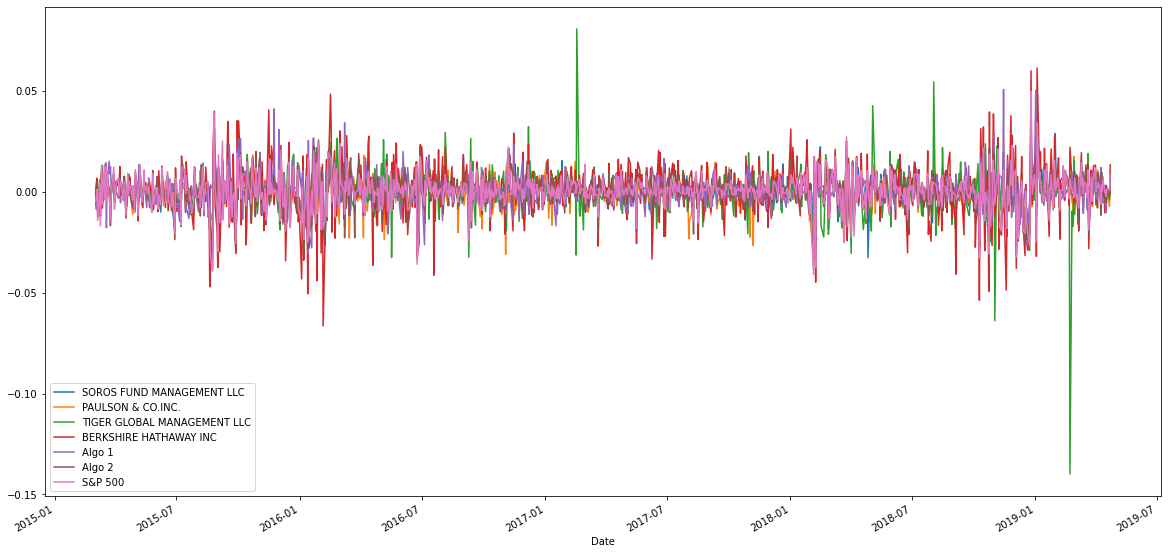

In [15]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

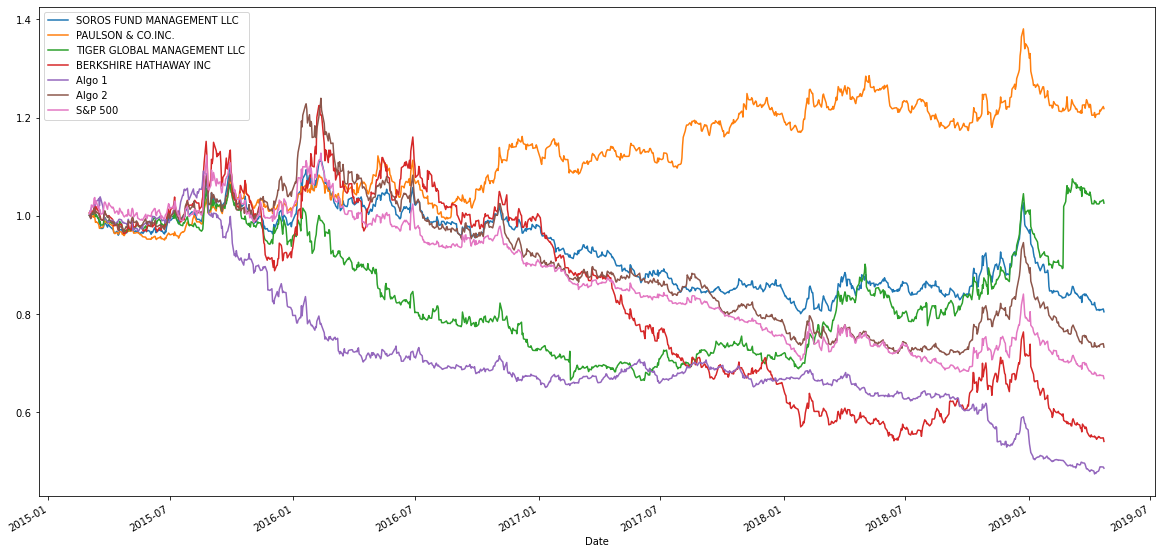

In [16]:
# Calculate cumulative returns of all portfolios
combined_cumulative_returns = (1-combined_returns).cumprod()

# Plot cumulative returns
combined_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

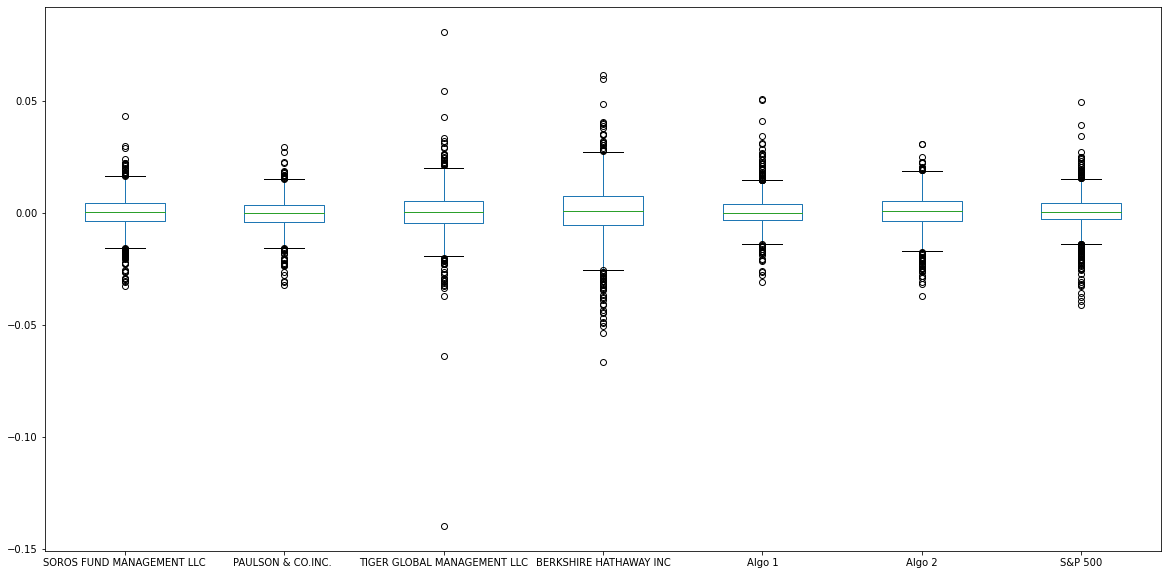

In [17]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = combined_returns.std()
combined_returns_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate the daily standard deviation of S&P 500
sp500_daily_std = combined_returns_std.loc['S&P 500']

# Determine which portfolios are riskier than the S&P 500

# low standard deviation => closer to mean (standard)
# high standard deviation => spread over wide range compare to mean (riskier)

for index, std in combined_returns_std.items():
    if std > sp500_daily_std:
        print(f'Portfolio : {index}, Standard Deviation : {round(std,4)}')

Portfolio : TIGER GLOBAL MANAGEMENT LLC, Standard Deviation : 0.0109
Portfolio : BERKSHIRE HATHAWAY INC, Standard Deviation : 0.0129


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_combined_returns_std = combined_returns_std * np.sqrt(252)
annualized_combined_returns_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

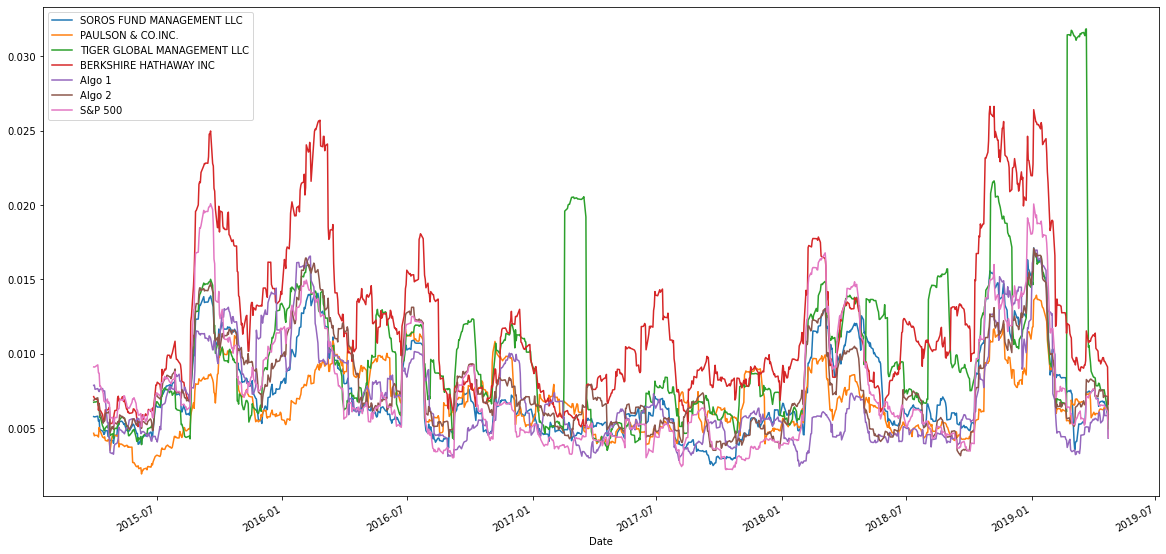

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling21_combined_returns_std = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling21_combined_returns_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

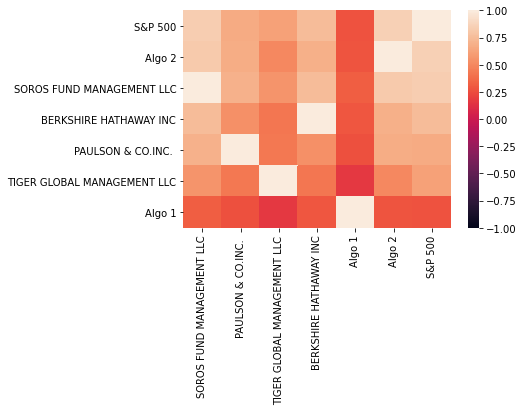

In [23]:
# Calculate the correlation
correlation_combined_returns = combined_returns.corr()
correlation_combined_returns.sort_values(by='S&P 500', ascending=False,inplace=True)

# Display de correlation matrix

# The portfolio which mimeks the S&P 500 closest is indicated with the highest number - closest to 1 (postive relationship). 
# To simplify - the results have been sorted.
# Algo 2 is closest to S&P 500

sns.heatmap(correlation_combined_returns, vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

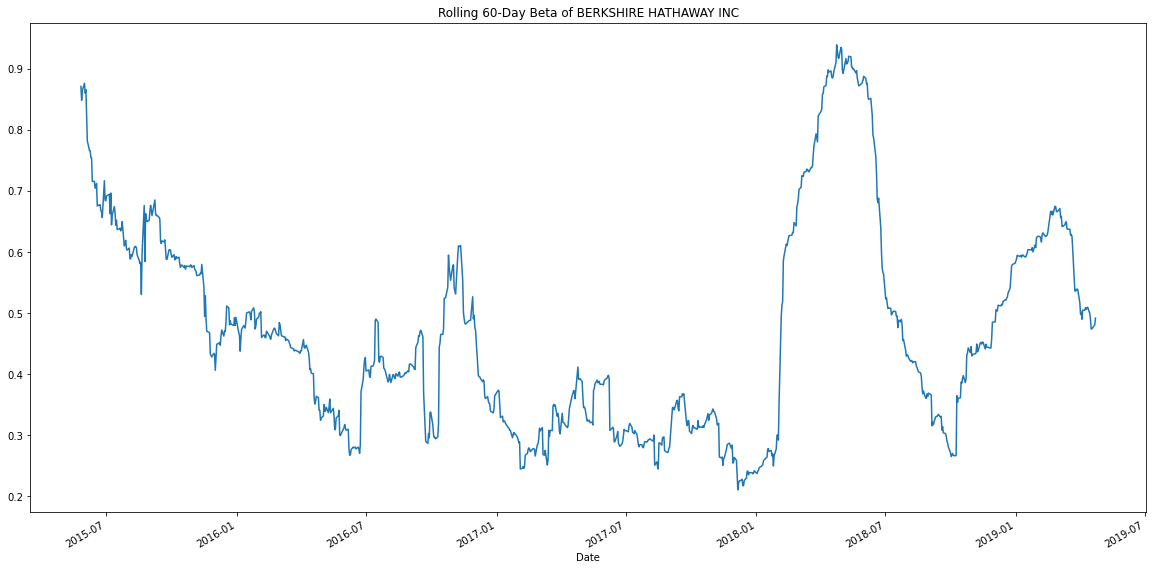

In [24]:
# Calculate covariance of a single portfolio
rolling_covariance_bh = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns['S&P 500'])

# Calculate variance of S&P 500
rolling_variance_bh = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).var()

# Computing beta
rolling_beta_bh = rolling_covariance_bh / rolling_variance_bh

# Plot beta trend
rolling_beta_bh.plot(figsize=(20,10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [25]:
# Use `ewm` to calculate the rolling window
ewm_bh = combined_returns['BERKSHIRE HATHAWAY INC'].ewm(span=21, adjust=False).mean()
ewm_bh

Date
2015-03-03   -0.006569
2015-03-04   -0.005589
2015-03-05   -0.004469
2015-03-06   -0.005253
2015-03-09   -0.004926
                ...   
2019-04-16    0.001277
2019-04-17    0.001454
2019-04-18    0.001496
2019-04-22    0.001261
2019-04-23    0.002353
Name: BERKSHIRE HATHAWAY INC, Length: 1043, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

<AxesSubplot:>

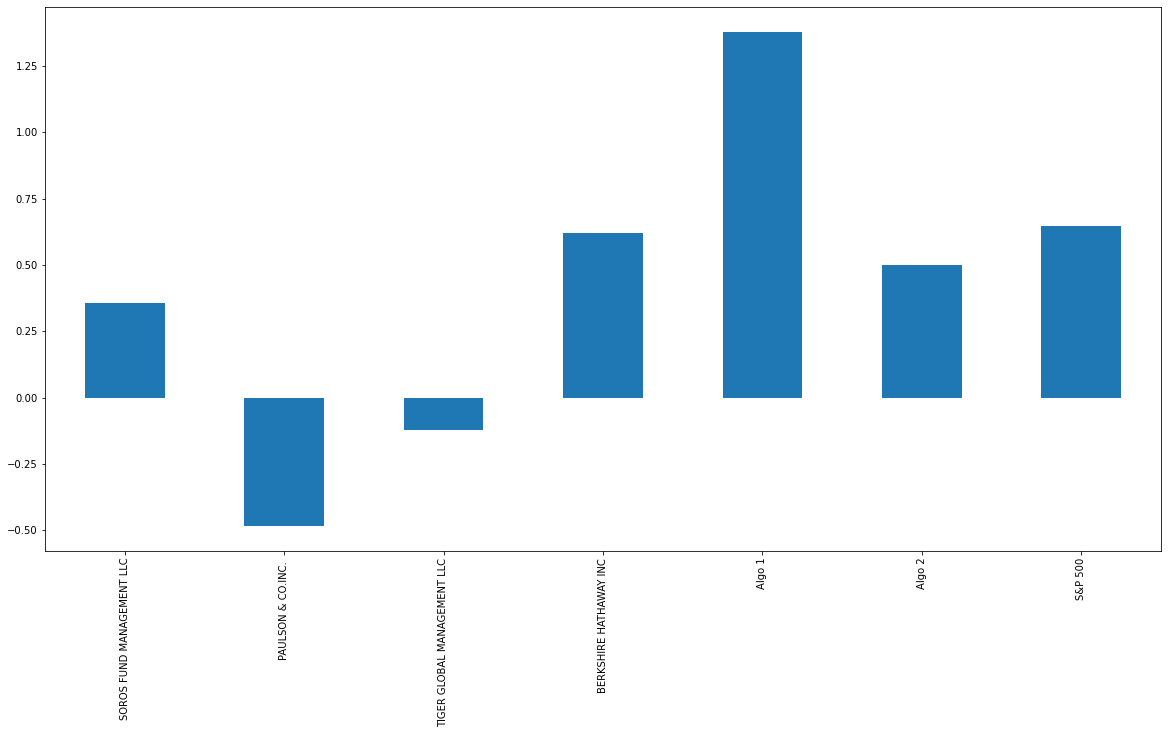

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

'Algo 1' outperforms both the market (S&P 500) and the whales portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
goog_csv = Path('resources/goog_historical.csv')
goog_df = pd.read_csv(goog_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_df.rename(columns={'NOCP': 'GOOG'}, inplace=True)
goog_df.drop(columns=['Symbol'], inplace=True)
goog_df.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [29]:
# Reading data from 2nd stock
aapl_csv = Path('resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_df.rename(columns={'NOCP': 'AAPL'}, inplace=True)
aapl_df.drop(columns=['Symbol'], inplace=True)
aapl_df.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [30]:
# Reading data from 3rd stock
cost_csv = Path('resources/cost_historical.csv')
cost_df = pd.read_csv(cost_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_df.rename(columns={'NOCP': 'COST'}, inplace=True)
cost_df.drop(columns=['Symbol'], inplace=True)
cost_df.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [31]:
# Combine all stocks in a single DataFrame
combined_custom_portfolio = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
combined_custom_portfolio.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [32]:
# Calculate daily returns
combined_custom_portfolio_daily_returns = combined_custom_portfolio.pct_change()

# Drop NAs
combined_custom_portfolio_daily_returns.dropna(inplace=True)

# Display sample data
combined_custom_portfolio_daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_combined_custom_portfolio_returns = combined_custom_portfolio_daily_returns.dot(weights)

# Display sample data
weighted_combined_custom_portfolio_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
final_portfolio_returns = pd.concat([combined_returns, weighted_combined_custom_portfolio_returns], axis='columns', join='inner')
final_portfolio_returns.rename(columns={0: 'CPK PORTFOLIO'}, inplace=True)
final_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,CPK PORTFOLIO
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.006112


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_portfolio_returns.dropna(inplace=True)
final_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,CPK PORTFOLIO
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.006112
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.009149
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.001541
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.001148
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.011812


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
annualized_final_portfolio_returns_std = final_portfolio_returns.std() * np.sqrt(252)
annualized_final_portfolio_returns_std

SOROS FUND MANAGEMENT LLC      0.146455
PAULSON & CO.INC.              0.116489
TIGER GLOBAL MANAGEMENT LLC    0.232069
BERKSHIRE HATHAWAY INC         0.246672
Algo 1                         0.133423
Algo 2                         0.139262
S&P 500                        0.151739
CPK PORTFOLIO                  0.212687
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

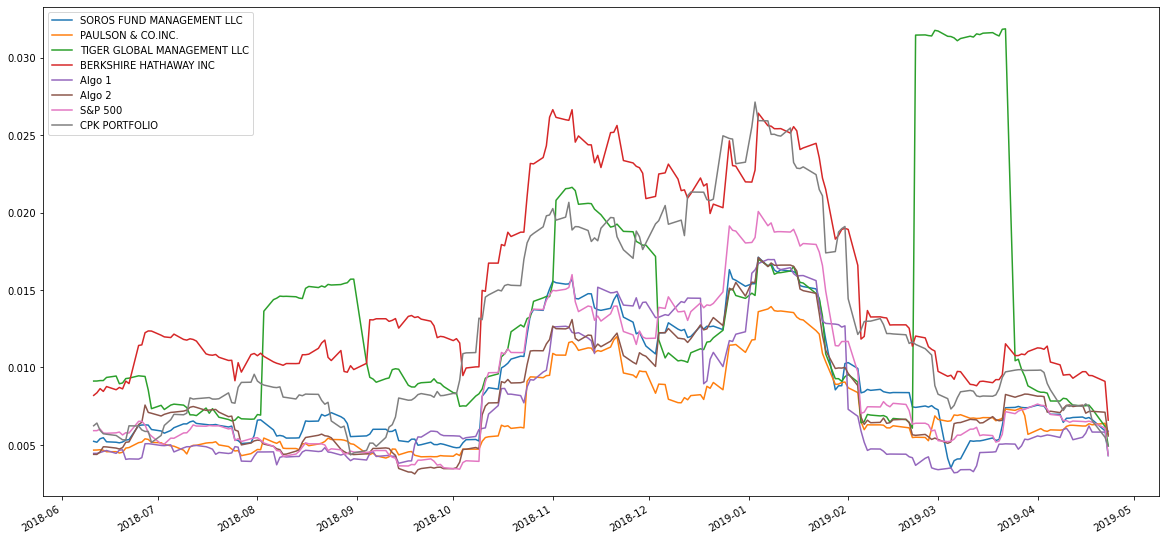

In [37]:
# Calculate rolling standard deviation
rolling21_final_portfolio_returns_std = final_portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling21_final_portfolio_returns_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [38]:
# Calculate and plot the correlation
correlation_final_portfolio_returns = final_portfolio_returns.corr()
correlation_final_portfolio_returns.sort_values(by='S&P 500', ascending=False)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,CPK PORTFOLIO
S&P 500,0.876089,0.766696,0.481095,0.851968,0.289290,0.875699,1.000000,0.070790
SOROS FUND MANAGEMENT LLC,1.000000,0.791191,0.477722,0.816670,0.337809,0.862258,0.876089,0.061454
Algo 2,0.862258,0.783646,0.409472,0.782646,0.365496,1.000000,0.875699,0.039845
BERKSHIRE HATHAWAY INC,0.816670,0.650499,0.325080,1.000000,0.327043,0.782646,0.851968,0.006772
PAULSON & CO.INC.,0.791191,1.000000,0.485421,0.650499,0.361243,0.783646,0.766696,0.025683
TIGER GLOBAL MANAGEMENT LLC,0.477722,0.485421,1.000000,0.325080,0.114449,0.409472,0.481095,0.036044
Algo 1,0.337809,0.361243,0.114449,0.327043,1.000000,0.365496,0.289290,0.073278
CPK PORTFOLIO,0.061454,0.025683,0.036044,0.006772,0.073278,0.039845,0.070790,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of CPK PORTFOLIO'}>

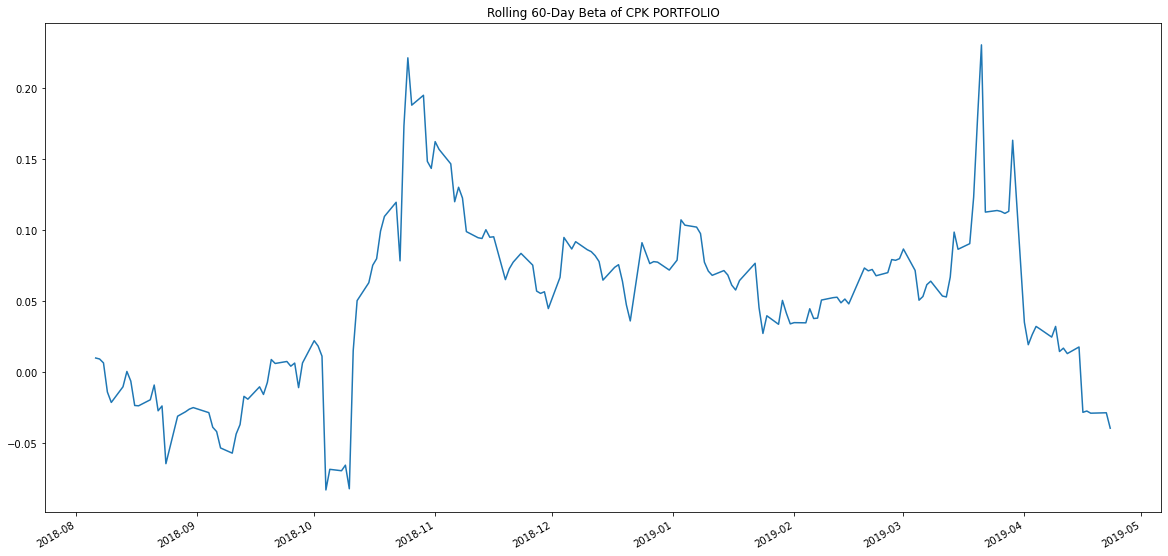

In [39]:
# Calculate and plot Beta

# Calculate covariance of CPK PORTFOLIO
rolling_covariance_cpk = final_portfolio_returns['CPK PORTFOLIO'].rolling(window=60).cov(final_portfolio_returns['S&P 500'])

# Calculate variance of S&P 500
rolling_variance_cpk = final_portfolio_returns['CPK PORTFOLIO'].rolling(window=60).var()

# Computing beta
rolling_beta_cpk = rolling_covariance_cpk / rolling_variance_cpk

# Plot beta trend
rolling_beta_cpk.plot(figsize=(20,10), title='Rolling 60-Day Beta of CPK PORTFOLIO')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualzied Sharpe Ratios
annualzied_final_portfolio_returns = (final_portfolio_returns.mean() * 252) / (final_portfolio_returns.std() * np.sqrt(252))

<AxesSubplot:>

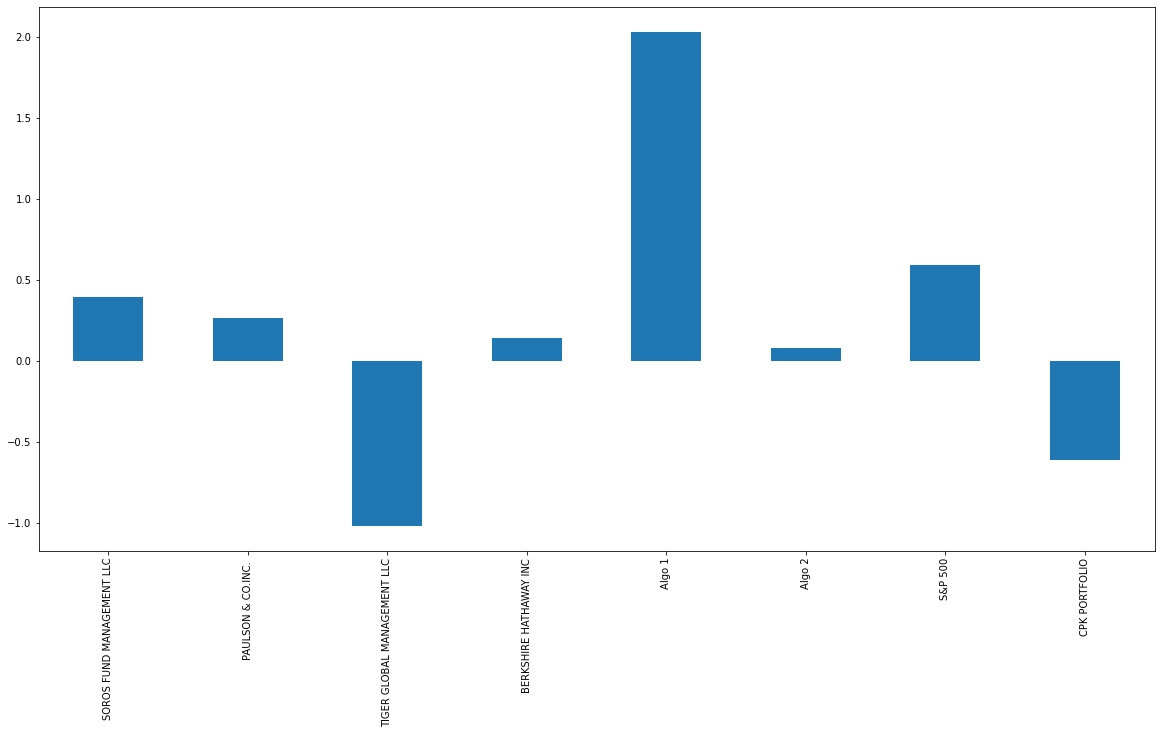

In [41]:
# Visualize the sharpe ratios as a bar plot
annualzied_final_portfolio_returns.plot(kind='bar', figsize=(20,10))

### How does your portfolio do?

1. The CPK Portfolio has a minimal positive correlation (relationship) to all other portfolios.
2. The CPK Portfolio also has a low beta compare to BERKSHIRE HATHAWAY INC for example. Which indicates low risk and lower returns.

When reviewing the sharpe ratio it becomes clear - if not sooner - the CPK Portfolio does not perform as well as other analysed Portfolios. Especially the Algo 1 Portfolio.